# Capstone 2 - Baseball Stat Projections - Data Wrangling

In [2]:
#Import relevant libraries

import os
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime


In [8]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data/"
save_path = "/Users/joeboardman/Documents/Springboard/Capstone 2/"
print(path)

/Users/joeboardman/Documents/Springboard/Capstone 2/data/


In [4]:
#create folder structure
data = os.path.join(save_path, 'data')
os.mkdir(data)

figures = os.path.join(save_path, 'figures')
os.mkdir(figures)

models = os.path.join(save_path, 'models')
os.mkdir(models)

FileExistsError: [Errno 17] File exists: '/Users/joeboardman/Documents/Springboard/Capstone 2/data'

In [46]:
#import csv files as dataframes with batting statistics and player information
os.chdir(path)
df = pd.read_csv('batting.csv')
df_player = pd.read_csv('player.csv')
df_salaries = pd.read_csv('salaries.csv')
df_position = pd.read_csv('appearances.csv')

In [47]:
#combine records where a player played for multiple teams into one record
df = df.groupby(['player_id', 'year'])['team_id', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp'].sum().reset_index()
df

/Users/joeboardman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,player_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,aardsda01,2004,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,45,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93893,zwilldu01,1910,27,87.0,7.0,16.0,5.0,0.0,0.0,5.0,1.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0
93894,zwilldu01,1914,154,592.0,91.0,185.0,38.0,8.0,16.0,95.0,21.0,0.0,46.0,68.0,0.0,1.0,10.0,0.0,0.0
93895,zwilldu01,1915,150,548.0,65.0,157.0,32.0,7.0,13.0,94.0,24.0,0.0,67.0,65.0,0.0,2.0,18.0,0.0,0.0
93896,zwilldu01,1916,35,53.0,4.0,6.0,1.0,0.0,1.0,8.0,0.0,0.0,4.0,6.0,0.0,0.0,2.0,0.0,0.0


In [48]:
#manipulate df_position so that it gives primary position per player, per year
print(df_position.shape)
df_position = df_position.iloc[:,[0,3,8,9,10,11,12,13,14,15,16,17,18]]
df_position['g_dh'] = df_position['g_dh'].fillna(0)
print(df_position.shape)
print(df_position.info())
print(df_position.head())

(100951, 21)
(100951, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100951 non-null  int64  
 1   player_id  100951 non-null  object 
 2   g_p        100951 non-null  int64  
 3   g_c        100951 non-null  int64  
 4   g_1b       100951 non-null  int64  
 5   g_2b       100951 non-null  int64  
 6   g_3b       100951 non-null  int64  
 7   g_ss       100951 non-null  int64  
 8   g_lf       100951 non-null  int64  
 9   g_cf       100951 non-null  int64  
 10  g_rf       100951 non-null  int64  
 11  g_of       100951 non-null  int64  
 12  g_dh       100951 non-null  float64
dtypes: float64(1), int64(11), object(1)
memory usage: 10.0+ MB
None
   year  player_id  g_p  g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  \
0  1871  barnero01    0    0     0    16     0    15     0     0     0     0   
1  1871  barrofr01 

In [49]:
#create column for # of games played as position player so we can delete pitchers
df_position['games_as_pos_player'] = df_position['g_c'] + df_position['g_1b'] + df_position['g_2b'] + df_position['g_3b'] + df_position['g_ss'] + df_position['g_lf'] + df_position['g_cf'] + df_position['g_rf'] + df_position['g_of'] + df_position['g_dh']
df_position = df_position.drop('g_p', axis=1)
df_position = df_position[df_position['games_as_pos_player'] > 0]
df_position

,year,player_id,g_c,g_1b,g_2b,g_3b,g_ss,g_lf,g_cf,g_rf,g_of,g_dh,games_as_pos_player
0,1871,barnero01,0,0,16,0,15,0,0,0,0,0.0,31.0
1,1871,barrofr01,0,0,1,0,0,13,0,4,17,0.0,35.0
2,1871,birdsda01,7,0,0,0,0,0,0,27,27,0.0,61.0
3,1871,conefr01,0,0,0,0,0,18,0,1,18,0.0,37.0
4,1871,gouldch01,0,30,0,0,0,0,0,1,1,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100942,2015,younger03,0,0,0,0,0,5,0,2,7,0.0,14.0
100945,2015,zimmery01,0,93,0,0,0,1,0,0,1,0.0,95.0
100947,2015,zobribe01,0,0,35,4,0,18,0,2,20,2.0,81.0
100948,2015,zobribe01,0,0,34,0,0,27,0,3,29,4.0,97.0


In [50]:
#merge dataframe to bring in player details, salaries, position etc.
df = pd.merge(df, df_player, on='player_id')
df = pd.merge(df, df_salaries, on=['player_id', 'year'])
df = pd.merge(df, df_position, on=['player_id', 'year'])
df = df[df['year'] >= 1985]
df = df[df['ab'] >= 130]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11634 entries, 0 to 14509
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            11634 non-null  object 
 1   year                 11634 non-null  int64  
 2   g                    11634 non-null  int64  
 3   ab                   11634 non-null  float64
 4   r                    11634 non-null  float64
 5   h                    11634 non-null  float64
 6   double               11634 non-null  float64
 7   triple               11634 non-null  float64
 8   hr                   11634 non-null  float64
 9   rbi                  11634 non-null  float64
 10  sb                   11634 non-null  float64
 11  cs                   11634 non-null  float64
 12  bb                   11634 non-null  float64
 13  so                   11634 non-null  float64
 14  ibb                  11634 non-null  float64
 15  hbp                  11634 non-null 

In [51]:
#Create datetime column with birthday to be able to calculate age
df['birth_date'] = pd.to_datetime((df.birth_year*10000+df.birth_month*100+df.birth_day).apply(str),format='%Y%m%d')

In [52]:
#calculate OPS, years of service, same team
df['obp'] = (df['h'] + df['bb'] + df['hbp']) / (df['ab'] + df['bb'] + df['hbp'])
df['slg'] = ((df['h'] - (df['double'] + df['triple'] + df['hr'])) + (df['double'] * 2) + (df['triple'] * 3) + (df['hr'] * 4)) / df['ab']
df['ops'] = df['obp'] + df['slg']
print(df.head())

   player_id  year    g     ab     r      h  double  triple    hr   rbi  ...  \
0  abbotje01  1998   89  244.0  33.0   68.0    14.0     1.0  12.0  41.0  ...   
2  abbotje01  2000   80  215.0  31.0   59.0    15.0     1.0   3.0  29.0  ...   
5  abbotku01  1994  101  345.0  41.0   86.0    17.0     3.0   9.0  33.0  ...   
6  abbotku01  1995  120  420.0  60.0  107.0    18.0     7.0  17.0  60.0  ...   
7  abbotku01  1996  109  320.0  37.0   81.0    18.0     7.0   8.0  33.0  ...   

   g_lf  g_cf  g_rf  g_of  g_dh  games_as_pos_player  birth_date       obp  \
0    20    38    27    76   0.0                161.0  1972-08-17  0.304348   
2    20    33    16    65   2.0                136.0  1972-08-17  0.344538   
5     0     0     0     0   0.0                 99.0  1969-06-02  0.292350   
6     0     0     0     0   0.0                115.0  1969-06-02  0.321041   
7     0     0     0     0   0.0                 97.0  1969-06-02  0.307246   

        slg       ops  
0  0.491803  0.796151  
2 

In [53]:
#calculate season number in a player's career and age
df['year_of_career'] = (df['year'] - pd.DatetimeIndex(df['debut']).year)
df['age'] = (df['year'] - pd.DatetimeIndex(df['birth_date']).year)
print(df.head())
print(df.info())

   player_id  year    g     ab     r      h  double  triple    hr   rbi  ...  \
0  abbotje01  1998   89  244.0  33.0   68.0    14.0     1.0  12.0  41.0  ...   
2  abbotje01  2000   80  215.0  31.0   59.0    15.0     1.0   3.0  29.0  ...   
5  abbotku01  1994  101  345.0  41.0   86.0    17.0     3.0   9.0  33.0  ...   
6  abbotku01  1995  120  420.0  60.0  107.0    18.0     7.0  17.0  60.0  ...   
7  abbotku01  1996  109  320.0  37.0   81.0    18.0     7.0   8.0  33.0  ...   

   g_rf  g_of  g_dh  games_as_pos_player  birth_date       obp       slg  \
0    27    76   0.0                161.0  1972-08-17  0.304348  0.491803   
2    16    65   2.0                136.0  1972-08-17  0.344538  0.395349   
5     0     0   0.0                 99.0  1969-06-02  0.292350  0.394203   
6     0     0   0.0                115.0  1969-06-02  0.321041  0.452381   
7     0     0   0.0                 97.0  1969-06-02  0.307246  0.428125   

        ops  year_of_career  age  
0  0.796151               1

In [54]:
#Delete unnecessary columns
df = df.drop(df.columns[[19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,43]], axis=1)

In [55]:
#Fill NaN values in 'obp', 'slg', 'ops' columns with zeros because the errors are driven by a player 
#having 0 at bats for a season
dftest1 = df[df['obp'].isna()]
print(dftest1.head())
df['obp'] = df['obp'].fillna(0)
df['slg'] = df['slg'].fillna(0)
df['ops'] = df['ops'].fillna(0)
print(df.info())
print(df.head())

Empty DataFrame
Columns: [player_id, year, g, ab, r, h, double, triple, hr, rbi, sb, cs, bb, so, ibb, hbp, sh, sf, g_idp, birth_country, debut, team_id, salary, g_c, g_1b, g_2b, g_3b, g_ss, g_lf, g_cf, g_rf, g_of, g_dh, games_as_pos_player, birth_date, obp, slg, ops, year_of_career, age]
Index: []

[0 rows x 40 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11634 entries, 0 to 14509
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_id            11634 non-null  object        
 1   year                 11634 non-null  int64         
 2   g                    11634 non-null  int64         
 3   ab                   11634 non-null  float64       
 4   r                    11634 non-null  float64       
 5   h                    11634 non-null  float64       
 6   double               11634 non-null  float64       
 7   triple               11634 non-null  float64       

In [56]:
#check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_rf,g_of,g_dh,games_as_pos_player,birth_date,obp,slg,ops,year_of_career,age


In [57]:
#Drop Duplicates
df.drop_duplicates(keep=False, inplace=True)

print(df)

       player_id  year    g     ab     r      h  double  triple    hr   rbi  \
0      abbotje01  1998   89  244.0  33.0   68.0    14.0     1.0  12.0  41.0   
2      abbotje01  2000   80  215.0  31.0   59.0    15.0     1.0   3.0  29.0   
5      abbotku01  1994  101  345.0  41.0   86.0    17.0     3.0   9.0  33.0   
6      abbotku01  1995  120  420.0  60.0  107.0    18.0     7.0  17.0  60.0   
7      abbotku01  1996  109  320.0  37.0   81.0    18.0     7.0   8.0  33.0   
...          ...   ...  ...    ...   ...    ...     ...     ...   ...   ...   
14501  zobribe01  2015  126  467.0  76.0  129.0    36.0     3.0  13.0  56.0   
14505  zuninmi01  2014  131  438.0  51.0   87.0    20.0     2.0  22.0  60.0   
14506  zuninmi01  2015  112  350.0  28.0   61.0    11.0     0.0  11.0  28.0   
14508  zupcibo01  1992  124  392.0  46.0  108.0    19.0     1.0   3.0  43.0   
14509  zupcibo01  1993  141  286.0  40.0   69.0    24.0     2.0   2.0  26.0   

       ...  g_rf  g_of  g_dh  games_as_pos_player  

In [58]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

player_id 1894
year 31
g 130
ab 565
r 142
h 212
double 59
triple 23
hr 64
rbi 154
sb 80
cs 29
bb 146
so 198
ibb 43
hbp 33
sh 29
sf 18
g_idp 34
birth_country 25
debut 1453
team_id 35
salary 2079
g_c 151
g_1b 163
g_2b 163
g_3b 163
g_ss 164
g_lf 163
g_cf 163
g_rf 163
g_of 163
g_dh 149
games_as_pos_player 345
birth_date 1775
obp 7006
slg 7766
ops 10637
year_of_career 25
age 30


In [59]:
print(df.birth_country.value_counts())

USA            8811
D.R.            991
Venezuela       602
P.R.            592
Cuba            133
CAN             104
Panama           77
Japan            69
Mexico           66
Colombia         38
Curacao          34
Jamaica          30
Germany          19
South Korea      13
V.I.             13
Australia        11
Nicaragua        10
Honduras          5
France            4
Singapore         3
Netherlands       3
Brazil            2
Aruba             2
Belize            1
Belgium           1
Name: birth_country, dtype: int64


In [60]:
round(df.describe().T,0)

,count,mean,std,min,25%,50%,75%,max
year,11634.0,2000.0,9.0,1985.0,1993.0,2000.0,2008.0,2015.0
g,11634.0,116.0,31.0,34.0,92.0,120.0,143.0,163.0
ab,11634.0,383.0,150.0,130.0,248.0,386.0,516.0,716.0
r,11634.0,53.0,27.0,4.0,29.0,49.0,72.0,152.0
h,11634.0,103.0,47.0,19.0,62.0,100.0,141.0,262.0
double,11634.0,20.0,10.0,0.0,11.0,19.0,27.0,59.0
triple,11634.0,2.0,2.0,0.0,1.0,2.0,3.0,23.0
hr,11634.0,12.0,10.0,0.0,4.0,9.0,17.0,73.0
rbi,11634.0,50.0,29.0,3.0,27.0,45.0,68.0,165.0
sb,11634.0,8.0,11.0,0.0,1.0,4.0,10.0,110.0


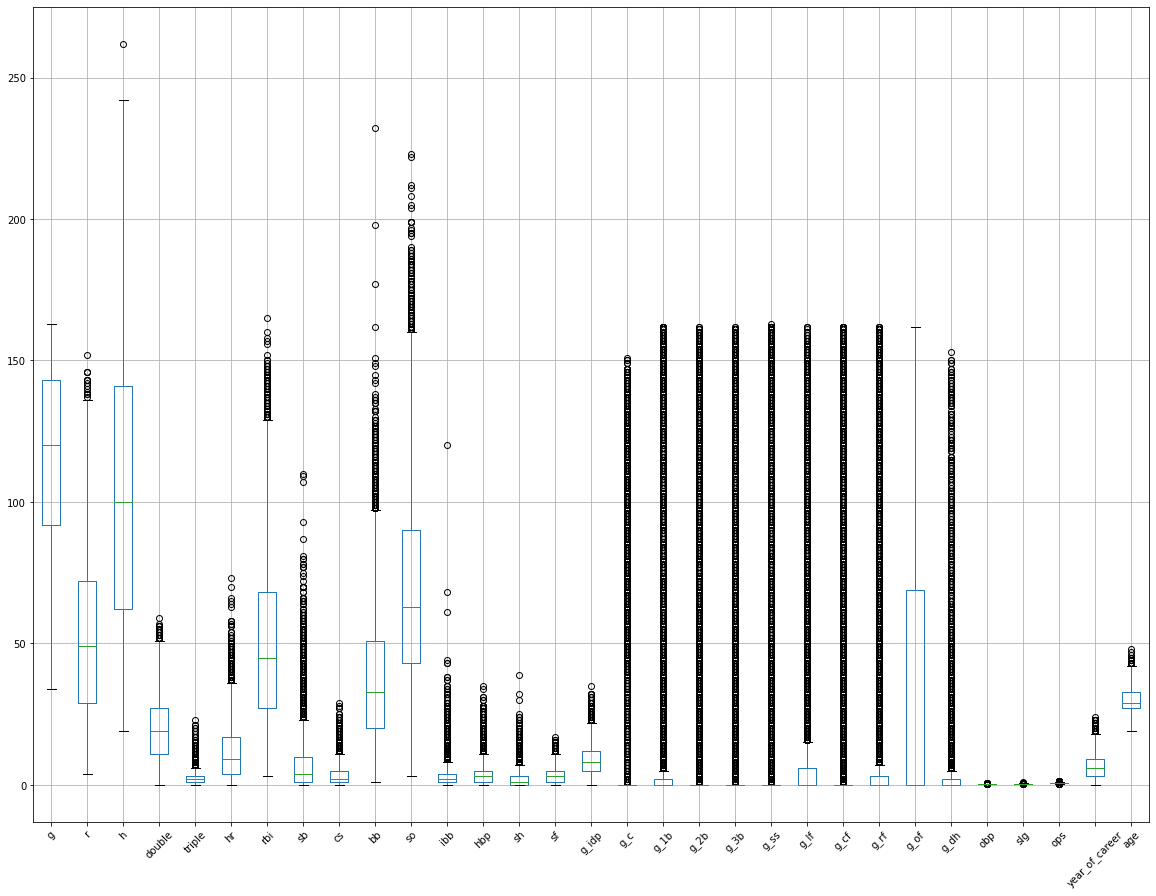

In [61]:
#Check for outliers
df_bp = df.drop(['salary', 'year', 'games_as_pos_player', 'ab'], axis=1)
df_bp.boxplot(figsize=(20, 15), rot=45)

In [62]:
# Write your dataframe to csv 
save = os.path.join(save_path, 'data', 'Baseball_DW.csv')
df.to_csv(save)